In [1]:
%pylab inline
import numpy as np 
import matplotlib.pyplot as plt 


Populating the interactive namespace from numpy and matplotlib


In [2]:
np.set_printoptions(precision = 4, suppress = True)

In [3]:
def V(r):
    return r**4-8*r**2

class particle(object):
    """A class for the particle in the potential"""
    
    def __init__(self, delta):
        self.position = np.random.rand(2)*2-1
        self.delta = delta
        
    def radius(self):
        return np.sqrt(np.dot(self.position,self.position))
    
    def mcmove(self):
        theta = np.random.rand()*2*np.pi
        rate = np.exp(-(V(self.radius()+delta)-V(self.radius())))
        prob = np.random.rand()
        del_pos = delta*np.array([np.cos(theta),np.sin(theta)])
        if all(np.abs(self.position+del_pos)<np.array([1.,1.])):
            if rate > prob:
                self.position+=del_pos

In [4]:
N_data = 2**20
delta = 0.1
part= particle(0.1)
radius = []
x = []

In [5]:
for i in xrange(N_data):
    radius.append(part.radius())
    x.append(part.position[0])
    part.mcmove()

In [6]:
def bunching(array):
    new_array = []
    while array!=[]:
        x = array.pop()
        y = array.pop()
        new_array.append((x+y)/2.)
    return new_array

In [7]:
error_r = []
error_x = []

In [8]:
for i in xrange(17):
    error_r.append(np.std(radius)/np.sqrt(len(radius)))
    error_x.append(np.std(x)/np.sqrt(len(x)))
    radius = bunching(radius)
    x = bunching(x)

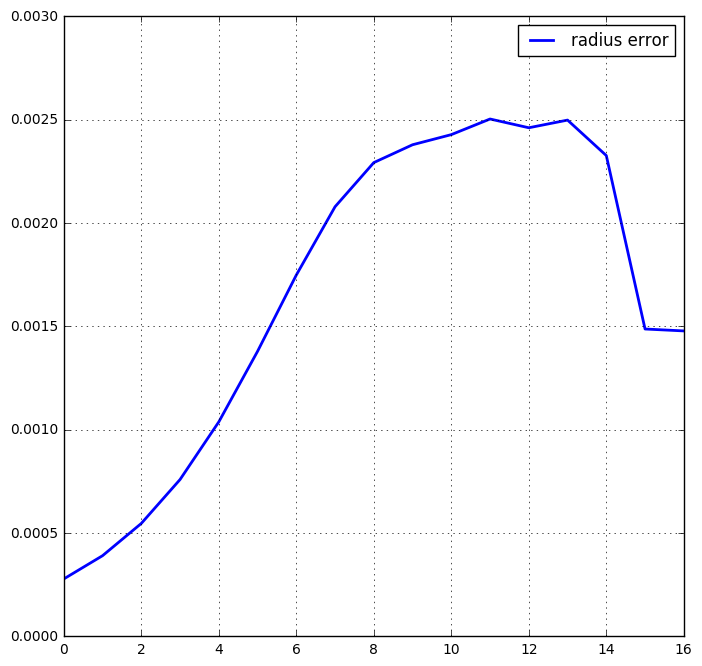

In [9]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(17), error_r, ls = '-', lw=2, label = "radius error")
plt.legend()
plt.grid()
plt.show()
plt.close()

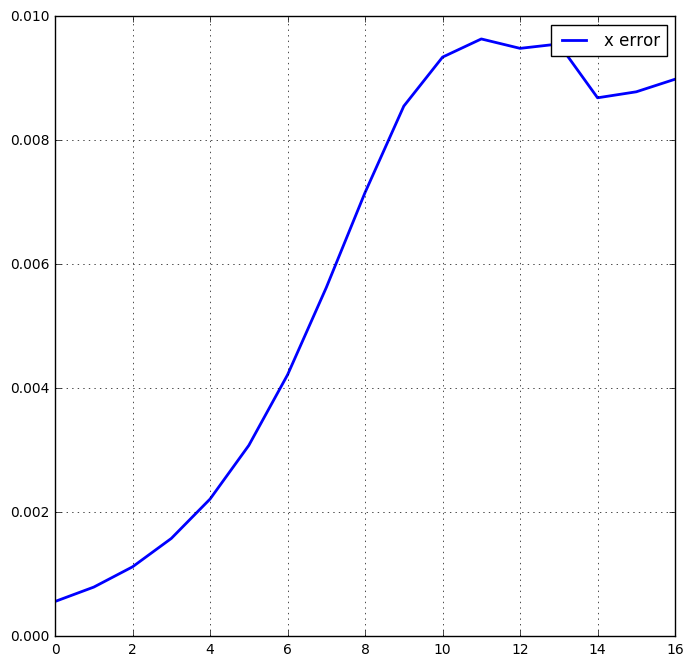

In [10]:
figure = plt.figure(figsize=(8,8))
plt.plot(xrange(17), error_x, ls = '-', lw=2, label = "x error")
plt.legend()
plt.grid()
plt.show()
plt.close()

numpy.ndarray